##  Ultimate Technologies Challenge

#### Part 1 ‐ exploratory data analysis

The attached logins.json file contains (simulated) timestamps of user logins in a particular geographic location. Aggregate these login counts based on 15minute time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand. Please report/illustrate important features of the demand, such as daily cycles. If there are data quality issues, please report them.

In [1]:
import json
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data = pd.read_json('logins.json')
d=data.copy()

In [3]:
d.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [4]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
login_time    93142 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [5]:
#Changing the index to login_time so that resample method can be applied of Timeseries for 15 minutes
d.set_index('login_time', inplace=True)

d.head()

""
login_time
1970-01-01 20:13:18
1970-01-01 20:16:10
1970-01-01 20:16:37
1970-01-01 20:16:36
1970-01-01 20:26:21


In [6]:
#adding a new column count so that we know no. of logins after converting the time interval gap of login time to 15 minutes
d['login_count']=1

In [7]:
#using resample( method to convert the time series into 15 minutes interval and saving as dn.
dn= d.resample('15T').sum()
#resetting the index
dn = dn.reset_index()
dn.head()

,login_time,login_count
0,1970-01-01 20:00:00,2
1,1970-01-01 20:15:00,6
2,1970-01-01 20:30:00,9
3,1970-01-01 20:45:00,7
4,1970-01-01 21:00:00,1


In [8]:
dn.columns

Index(['login_time', 'login_count'], dtype='object')

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

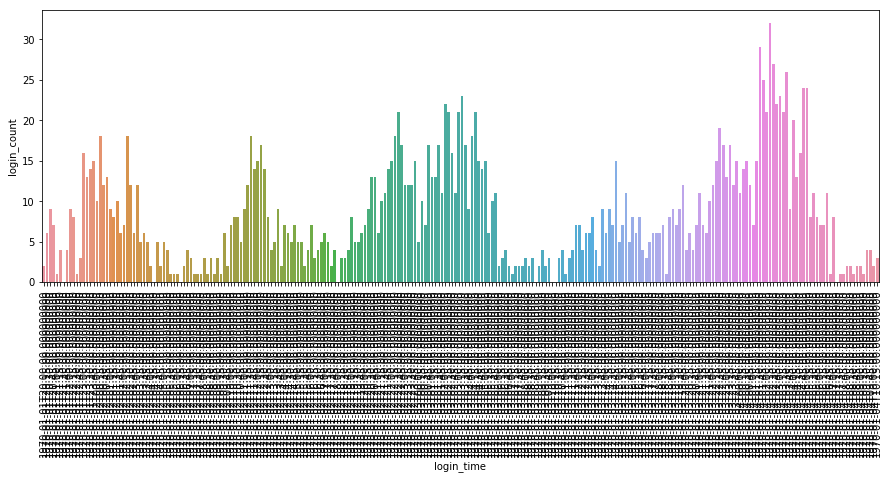

In [9]:
#Creating bar plot using seaborn library
plt.figure(figsize=(15,5))
p = sns.barplot(x='login_time', y='login_count', data=dn.iloc[:250])
plt.xticks(rotation=90)



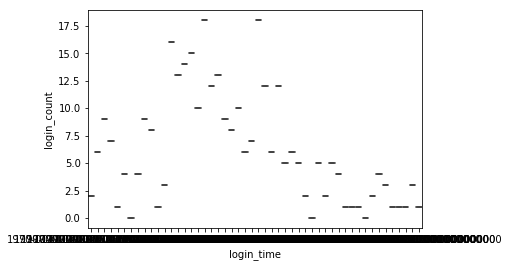

In [17]:
# Trying Box plot
bx = sns.boxplot(x="login_time", y="login_count", data=dn.iloc[:50])

In [18]:
#Again resetting the index for the scatter plot
dn.set_index('login_time', inplace=True)
dn.head()

,login_count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


Text(0, 0.5, 'Login Counts per 15 minute interval')

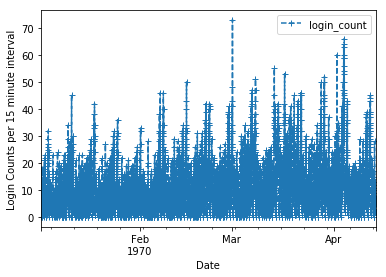

In [19]:
# Creating a line plot to check the login entries/count over the period of time using the timeseries.
dn.plot(marker = '+',linestyle = '--');
plt.xlabel('Date')
plt.ylabel('Login Counts per 15 minute interval')


In [20]:
dn.describe().T

,count,mean,std,min,25%,50%,75%,max
login_count,9788.0,9.515938,8.328818,0.0,3.0,7.0,13.0,73.0


After dividing the time series into 15 min time intervals and trying to plot the bar chart for the data, there is no clear indication of what data represents. Even after trying the line plot there is a faint idea that in March the number of login were high around 72 and also there was a rise again in the login around first week of April. Data has a mean of 9.51 and the median of 7.0. 



In [23]:
#To see the variations in data as per different timeline, we will plot line chart for days ,weeks , months and hours
dn_h=dn.resample('H').sum() #login counts as per hours
dn_d = dn.resample('D').sum()#login counts as per days
dn_w=dn.resample('W').sum() #login counts as per weeks
dn_m=dn.resample('M').sum() #login counts as per month

Text(0.5, 0, 'Date')

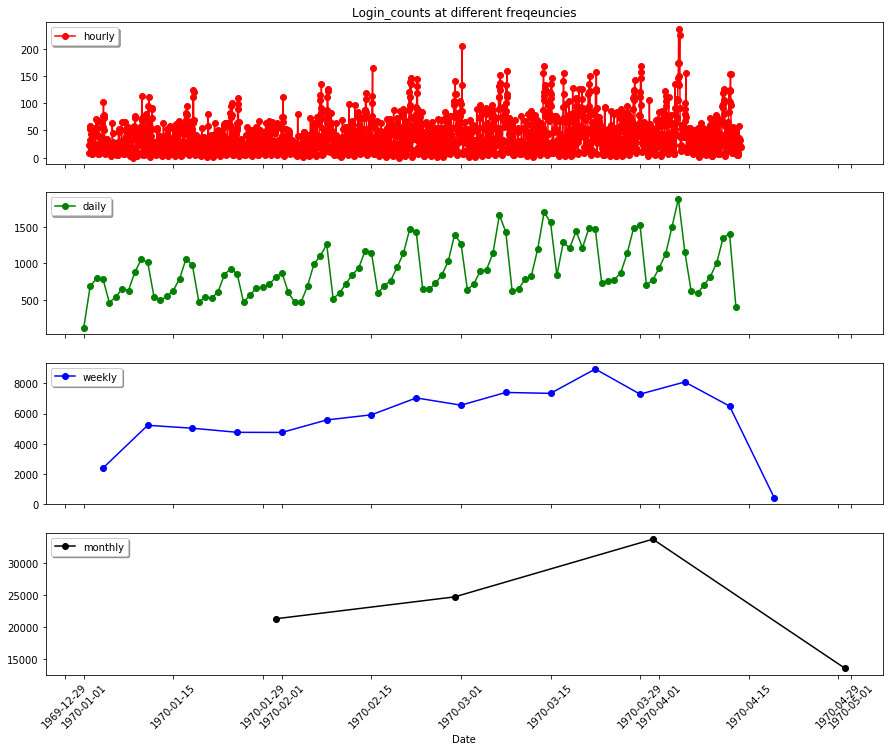

In [45]:
fig,(ax1,ax2,ax3,ax4) = plt.subplots(4,1,figsize = (15,12),sharex=True)
ax1.plot(dn_h,marker ='o', color='r', label='hourly')
ax1.legend(shadow=True, fancybox=True, loc = 'upper left')
ax1.set_title('Login_counts at different freqeuncies')
ax2.plot(dn_d, marker ='o', color='g', label='daily')
ax2.legend(shadow=True, fancybox=True, loc = 'upper left')
ax3.plot(dn_w, marker ='o', color='b', label='weekly')
plt.xticks(rotation = '45')
ax3.legend(shadow=True, fancybox=True, loc = 'upper left')
ax4.plot(dn_m, marker ='o', color='k', label='monthly')
ax4.legend(shadow=True, fancybox=True, loc = 'upper left')

plt.xticks(rotation = '45')


ax4.set_xlabel('Date')


The montly plot suggested an increase in the login-counts each month (Jan-Feb-Mar). The data point for month of April is not reliable as the observations were only measured for the first week of the month. The increased number of logins was also supported by the weekly frequency plot. since the observations were not measured for the entire week, the last point of the frequency plot was not representative of the weekly login freqeuncy suggested by the previous weekly measurements.

Daily freqeuncy plot was most informational among all the time series measured at different freqeuncies. It supported an increasing trend of logins and also suggested some uniformity in the data after about 6-7 daily observations, suggesting a seasonal pattern over the week. Hourly data plot had informational congestion due to too many points to explore.


In [65]:
import calendar

dn_d['login_day'] = dn_d.index.weekday
dn_d['login_month']= [calendar.month_name[i] for i in dn_d.index.month]
dn_d.head()


,login_count,login_day,login_month
login_time,,,
1970-01-01,112,3,January
1970-01-02,681,4,January
1970-01-03,793,5,January
1970-01-04,788,6,January
1970-01-05,459,0,January


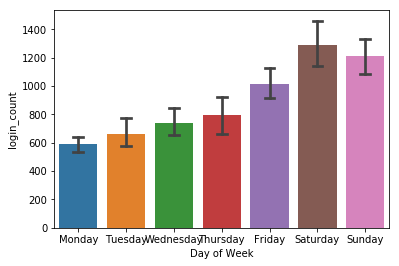

In [73]:
sns.barplot(x='login_day', y='login_count', data=dn_d, capsize = 0.2)
plt.xticks(np.arange(0,7),list(calendar.day_name))
plt.xlabel('Day of Week')
plt.show()


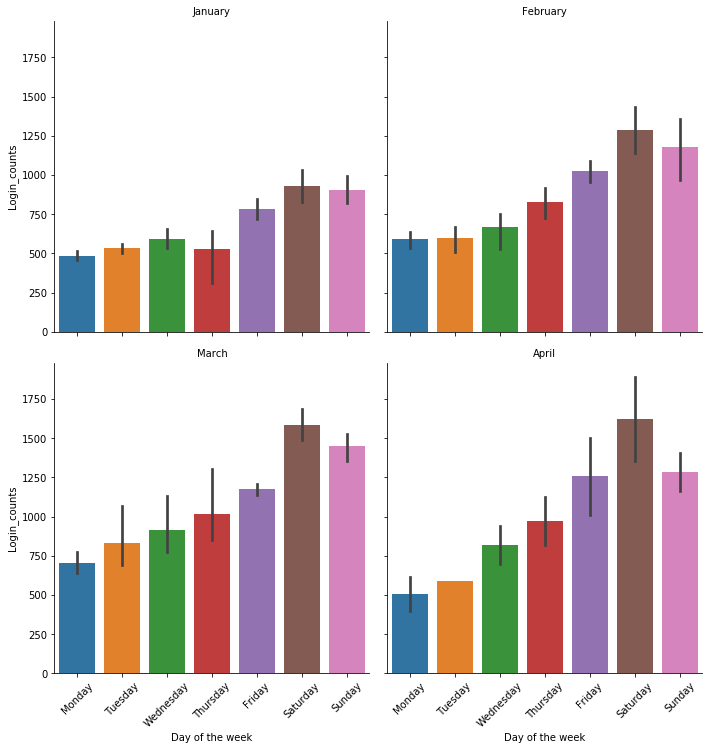

In [80]:
s= sns.catplot(x='login_day', y='login_count',col='login_month', col_wrap=2, data =dn_d, kind='bar')
s.set_axis_labels ("Day of the week", "Login_counts")
s.set_xticklabels(list(calendar.day_name), rotation = '45')
s.set_titles("{col_name}")

In [ ]:
#as per the above bar charts , it clearly depicts that the no. of logins were more on weekends then weekdays. 

In [83]:
#checking the data for logins as per different hours 
dn_h['login_hour'] = dn_h.index.hour
dn_h.head()

,login_count,login_hour
login_time,,
1970-01-01 20:00:00,24,20
1970-01-01 21:00:00,9,21
1970-01-01 22:00:00,21,22
1970-01-01 23:00:00,58,23
1970-01-02 00:00:00,53,0


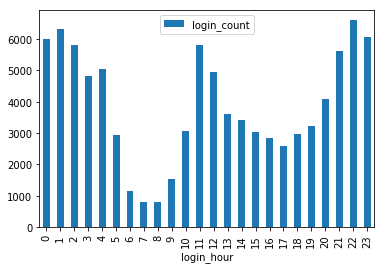

In [84]:
dn_h.groupby('login_hour').sum().plot(kind = 'bar')

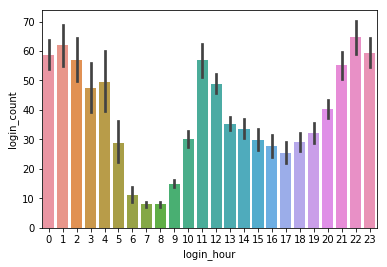

In [86]:
sns.barplot(dn_h.login_hour,dn_h.login_count);

As per the above 2 plots , they show the variation of login_count during different hours of day.

In [87]:
dn_h.describe()

,login_count,login_hour
count,2447.000000,2447.000000
mean,38.063752,11.496935
std,30.752820,6.923355
min,0.000000,0.000000
25%,15.000000,5.500000
50%,29.000000,11.000000
75%,52.000000,17.000000
max,237.000000,23.000000


### Conclusion

1. The login counts shows an upward trend during weekends and it falls suddenly in the starting of the week and remain nearly constant for the whole week.
2. On hourly basis the trend was mostly uniform except around hours 6-9am where the login count decreases drasticaly.
3. The logins start increasing around 11 am-12am and then it majorly increases around night.

#### Part 2 ‑ Experiment and metrics design

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on
weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active
during the day. On weekends, there is reasonable activity in both cities.
However, a toll bridge, with a two way
toll, between the two cities causes driver partners to tend
to be exclusive to each city. The Ultimate managers of city operations for the two cities have
proposed an experiment to encourage driver partners to be available in both cities, by
reimbursing all toll costs.
1. What would you choose as the key measure of success of this experiment in
encouraging driver partners to serve both cities, and why would you choose this metric?
2. Describe a practical experiment you would design to compare the effectiveness of the
proposed change in relation to the key measure of success. Please provide details on:

a. how you will implement the experiment

b. what statistical test(s) you will conduct to verify the significance of the
observation


c. how you would interpret the results and provide recommendations to the city
operations team along with any caveats.

#### Answer

1. Majorly the success of this experiment will depend if we were able to collect GPS location of each ride or number of trips between cities per day or measuring the reimbursement claims to see the increase in the movement of cabs and track on which side movement is more. The more evenly distributed rides means better results. Demand for rides in Gotham is high at night whereas demand is high in day for Metroplis. As per me if any rider were available for 40% of the time in the other city then taht would be considered as success of the initiative.

2. a) For the initial stage of the experiment it is suggested that we look only on the weekend data and prvide the incentives for drivers on weekends as the demand is high in both citites on weekend. This will indeed help us to understand the travel route and load on both sides cab crossing cities. I would be creating 2 groups : one will be randomly chosen and given opportunity of the taking benefit of reimbursement and the other random group will not be provided  wit the incentive. Then we can check by dividing the number of rides in other city vs the total rides of first group and comare the result with the second group. 
2. b) The best way to do that is creating the hypothesis test : Null Hypothesis: Incentive plan helped the frequency of riders going to other city to increase. Alternate hypothesis: Incentive plan did not have any effect on the frequency of riders taking intracity rides.

2. c) If the results show increase in number of intracity rides, i.e. on an avergae 35-40% riders of first group crosees the city , this would mean that this is success becuase if the difference is not much then there is no advantage of this incentive scheme
 


